<a href="https://colab.research.google.com/github/michaeledge27/CSCI290/blob/main/notebooks/GMMPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dfWithTargets = pd.read_csv('https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/Iris.csv')

In [4]:
dfWithTargets = dfWithTargets.drop(columns=['Id'])

In [5]:
df = dfWithTargets[dfWithTargets.columns[:-1]]

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(df)

GaussianMixture(n_components=3, n_init=10)

In [8]:
gm.weights_

array([0.30118609, 0.33333333, 0.36548058])

In [9]:
gm.means_

array([[5.91697517, 2.77803998, 4.20523542, 1.29841561],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.54632887, 2.94943079, 5.4834877 , 1.98716063]])

In [10]:
gm.covariances_

array([[[0.27550587, 0.09663458, 0.18542939, 0.05476915],
        [0.09663458, 0.09255531, 0.09103836, 0.04299877],
        [0.18542939, 0.09103836, 0.20227635, 0.0616792 ],
        [0.05476915, 0.04299877, 0.0616792 , 0.03232217]],

       [[0.121765  , 0.098292  , 0.015816  , 0.010336  ],
        [0.098292  , 0.142277  , 0.011448  , 0.011208  ],
        [0.015816  , 0.011448  , 0.029505  , 0.005584  ],
        [0.010336  , 0.011208  , 0.005584  , 0.011265  ]],

       [[0.38741443, 0.09223101, 0.30244612, 0.06089936],
        [0.09223101, 0.11040631, 0.08386768, 0.0557538 ],
        [0.30244612, 0.08386768, 0.32595958, 0.07283247],
        [0.06089936, 0.0557538 , 0.07283247, 0.08488025]]])

In [11]:
gm.converged_

True

In [12]:
gm.n_iter_

17

In [13]:
predict = gm.predict(df)

In [14]:
gm.predict_proba(df).round(2)

array([[0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
 

In [15]:
X_new, y_new = gm.sample(6)

In [16]:
X_new

array([[ 5.14171751,  2.41960229,  3.62336353,  1.12380772],
       [ 5.1386197 ,  3.40029321,  1.24038448, -0.01480115],
       [ 4.69140182,  3.41065127,  1.32722948,  0.16724486],
       [ 5.20136739,  3.44974513,  1.49397495,  0.08334507],
       [ 8.01047452,  3.39708778,  7.01108365,  2.33368698],
       [ 6.40581748,  3.05787588,  5.19828627,  1.78104416]])

In [17]:
y_new

array([0, 1, 1, 1, 2, 2])

In [202]:
from matplotlib.colors import LogNorm

In [203]:
import matplotlib.pyplot as plt

In [204]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [205]:
def plot_gaussian_mixture(clusterer, X, x1, x2, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    X_np = X.values
    plt.plot(X_np[:, 0], X_np[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel(x1)
    if show_ylabels:
        plt.ylabel(x2, rotation=0)
    else:
        plt.tick_params(labelleft=False)


In [22]:
df2Features = df[['SepalLengthCm', 'SepalWidthCm']]

In [23]:
gm2 = GaussianMixture(n_components=3, n_init=10)

In [24]:
gm2.fit(df2Features)

GaussianMixture(n_components=3, n_init=10)

<ipython-input-21-995b330eb590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-21-995b330eb590>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

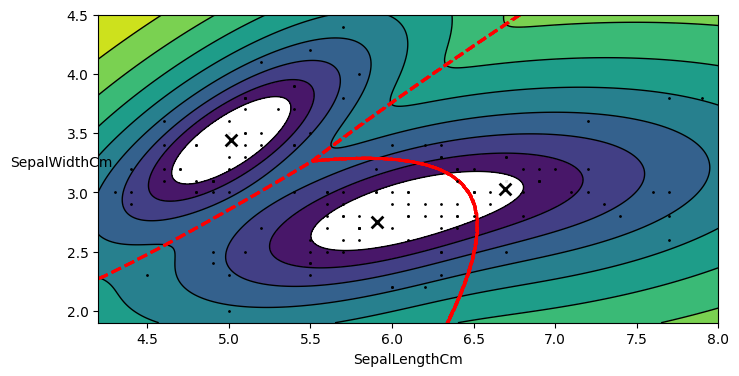

In [26]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm2, df2Features, 'SepalLengthCm', 'SepalWidthCm')

plt.show()

In [206]:
pdf = pd.read_csv('https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv')

In [207]:
pdf

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [208]:
pdf2Features = pdf[['bill_length_mm', 'bill_depth_mm']]
pdf2Features = pdf2Features.dropna()

In [209]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(pdf2Features)

GaussianMixture(n_components=3, n_init=10)

<ipython-input-205-995b330eb590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-205-995b330eb590>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.war

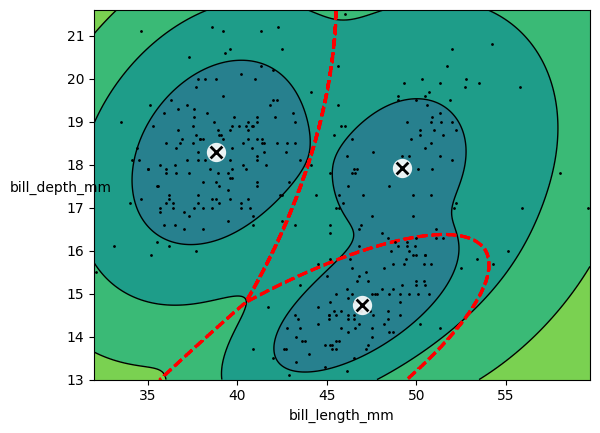

In [210]:
plot_gaussian_mixture(gm, pdf2Features, 'bill_length_mm', 'bill_depth_mm')
plt.show()

# k-means

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [212]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [213]:
# return random sample of k initial centroids
def get_random_centroids(df, k):
    return df.sample(k)[df.columns[:-1]]

In [214]:
# compare old centroids to new centroids to see if the algorithm has converged yet
# return true if new_centroids is equal to old_centroids, false otherwise
def check_new_centroids(old_centroids, new_centroids):
    if old_centroids.empty:
        return False  # Return False at start of loop
    return np.allclose(old_centroids.values, new_centroids.values, atol=0.001)

In [215]:
def update_centroids(df):
    return df.groupby("current_cluster").mean()[df.columns[:-1]]

In [216]:
# plot data and centroids for each iteration
def plot_clusters(df, centroids, iteration,):
    plt.figure(figsize=(5, 3))

    # Plot each cluster
    # sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, hue = "current_cluster");
    # sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data = df, hue = "current_cluster");
    sns.scatterplot(x = "flipper_length_mm", y = "body_mass_g", data = df, hue = "current_cluster");


    # Plot the centroids
    # plt.scatter(
    #     centroids["SepalLengthCm"], centroids["SepalWidthCm"],
    #     color="red", marker="X", s=200, label="Centroids"
    # )
    # plt.scatter(
    #     centroids["bill_length_mm"], centroids["bill_depth_mm"],
    #     color="red", marker="X", s=200, label="Centroids"
    # )
    plt.scatter(
        centroids["flipper_length_mm"], centroids["body_mass_g"],
        color="red", marker="X", s=200, label="Centroids"
    )

    plt.title(f'Iteration {iteration}')
    # plt.xlabel("SepalLengthCm")
    # plt.ylabel("SepalWidthCm")
    # plt.xlabel("bill length (mm)")
    # plt.ylabel("bill depth (mm)")
    plt.xlabel("flipper length (mm)")
    plt.ylabel("body mass (g)")
    plt.legend()
    plt.show()
    plt.pause(1)
    clear_output(wait=True)


In [217]:
def get_cluster(df, centroids, plot=True):
    # initialize old centroids as an empty dataframe
    old_centroids = pd.DataFrame()
    # keep track of what iteration we are on for plotting
    iteration = 0
    # run iteratively while the new centroids are different from the old ones
    while not check_new_centroids(old_centroids, centroids):
        # update the old centroids
        old_centroids = centroids.copy()
        # iterate over each point in the data frame
        for i in df.index:
            # store distances from current point to each centroid
            distances = []
            # iterate over each centroid
            for _, centroid in centroids.iterrows():
                # calculate euclidean distance from current point to current centroid
                distances.append(euclidean_distance(df.loc[i, df.columns[:-1]], centroid))
            # assign the point to the cluster with the closest centroid
            closest_cluster = np.argmin(distances)
            df.loc[i, 'current_cluster'] = closest_cluster

        if plot:
          # plot clusters and centroids
          plot_clusters(df, centroids, iteration)
        #update centroids
        centroids = update_centroids(df)
        iteration += 1
    return centroids, df
    # # plot clusters and centroids
    plot_clusters(df, centroids, iteration)


In [218]:
def initialize_centroids(df, k):
    # initialize list to hold k centroids
    centroids = []
    # randomly select first centroid
    first_centroid = df.sample(1).iloc[0]
    # add it to the centroid list
    centroids.append(first_centroid)
    # get remaining k-1 centroids
    for i in range(1, k):     # k is exclusive
        # initialize list to hold distances from new centroids to the first centroid
        distances = []
        # loop through each point in the data frame
        for i in df.index:
            point = df.loc[i, df.columns[:-1]]
            # Calculate the distance from the current point to each centroid
            min_distance = min(euclidean_distance(point, centroid) for centroid in centroids)
            distances.append(min_distance**2)  # Append squared distance
        # compute probabilities
        probabilities = distances / np.sum(distances)
        # select new centroid
        new_centroid = df.sample(1, weights=probabilities).iloc[0]
        # add new centroid to list
        centroids.append(new_centroid)

    return pd.DataFrame(centroids, columns=df.columns[:-1])

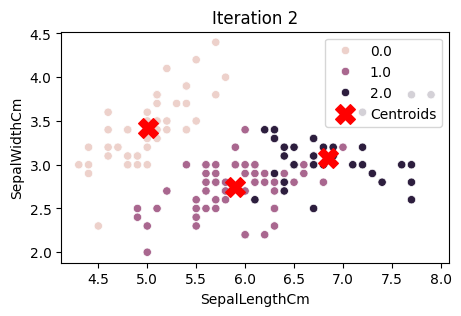

In [44]:
centroids, df = get_cluster(df, initialize_centroids(df, 3), plot=True)

<ipython-input-21-995b330eb590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-21-995b330eb590>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

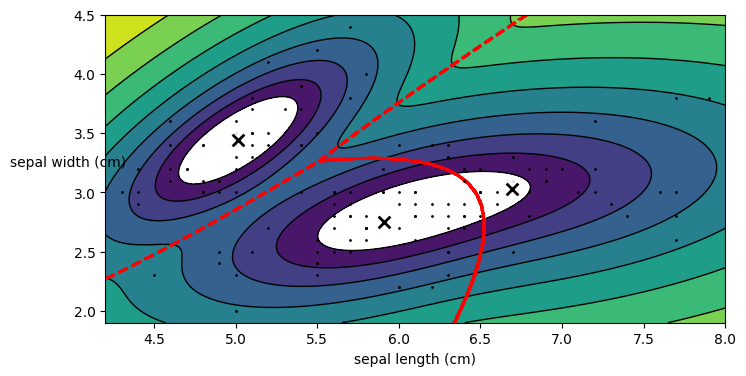

In [45]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm2, df2Features, 'sepal length (cm)', 'sepal width (cm)')

plt.show()

In [46]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(df2Features)

GaussianMixture(n_components=3, n_init=10)

In [47]:
means = gm.means_

In [48]:
centroids

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
current_cluster,,,,
0.0,5.006000,3.418000,1.464000,0.244000
1.0,5.901613,2.748387,4.393548,1.433871
2.0,6.850000,3.073684,5.742105,2.071053


In [49]:
centroidValues = centroids[['SepalLengthCm', 'SepalWidthCm']].values
centroidValues

array([[5.006     , 3.418     ],
       [5.9016129 , 2.7483871 ],
       [6.85      , 3.07368421]])

In [50]:
means

array([[6.69225795, 3.03018616],
       [5.01494511, 3.44040237],
       [5.90652226, 2.74740414]])

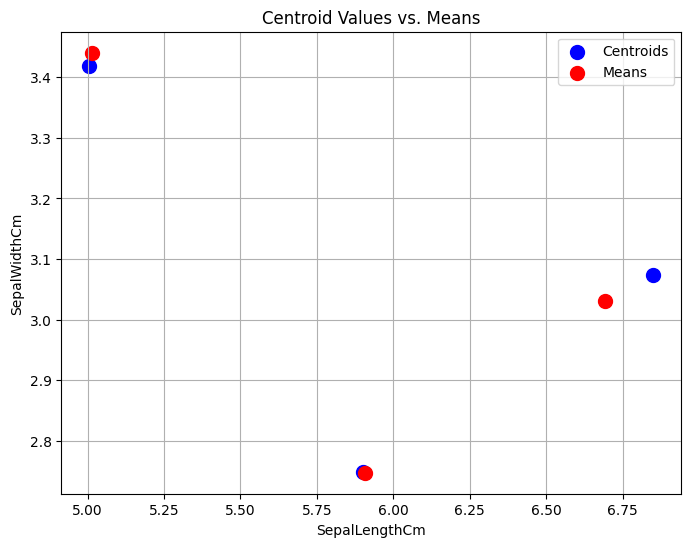

In [51]:

plt.figure(figsize=(8, 6))

plt.scatter(centroidValues[:, 0], centroidValues[:, 1], color='blue', label='Centroids', s=100)

plt.scatter(means[:, 0], means[:, 1], color='red', label='Means', s=100)

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Centroid Values vs. Means')
plt.legend()
plt.grid(True)
plt.show()

In [219]:
def calculate_accuracy(df, clustered_df, target):
    accuracy = 0
    for i in df.index:
        if df.loc[i, target] == clustered_df.loc[i, 'current_cluster']:
            accuracy += 1
    return accuracy / len(df)

In [53]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,current_cluster
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [54]:
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
target_names = {
    "Iris-setosa": 0.0,
    "Iris-versicolor": 1.0,
    "Iris-virginica": 2.0,
}

dfWithTargets["species_name"] = dfWithTargets["Species"].map(target_names)
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_name
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [58]:
calculate_accuracy(dfWithTargets, df, 'species_name')

0.8933333333333333

In [59]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
predicteddf = pd.DataFrame(predict, columns=['current_cluster'])

In [61]:
predicteddf

,current_cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


In [62]:
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_name
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [67]:
target_names = {
    "Iris-setosa": 1.0,
    "Iris-versicolor": 0.0,
    "Iris-virginica": 2.0,
}

dfWithTargets["species_name"] = dfWithTargets["Species"].map(target_names)
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_name
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [68]:
calculate_accuracy(dfWithTargets, predicteddf, 'species_name')

0.9666666666666667

# penguins

In [220]:
pdf = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

In [221]:
pdf

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [222]:
pdf = pdf.dropna()
pdf = pdf.drop(columns=['year', 'island', 'sex'])

In [223]:
pdf

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0


In [224]:
pdfWithTargets = pdf

In [225]:
pdf = pdf.drop(columns=['species'])

In [226]:
pdf

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [228]:
pdfWithTargets

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0


In [229]:
gm3 = GaussianMixture(n_components=3, n_init=10)
gm3.fit(pdf)

GaussianMixture(n_components=3, n_init=10)

In [230]:
gm3.weights_

array([0.35735726, 0.2025654 , 0.44007734])

In [231]:
gm3.means_

array([[  47.56806811,   14.99663801,  217.23529363, 5092.43693171],
       [  48.91720878,   18.47040398,  196.45197607, 3752.50186569],
       [  38.82286779,   18.32460316,  189.83477911, 3697.32899841]])

In [232]:
Ppredict = gm3.predict(pdf)
Ppredict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

In [233]:
gm3.converged_

True

In [234]:
predict = gm3.predict(pdf)
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

In [238]:
pdf2Features = pdf[['flipper_length_mm', 'body_mass_g']]
pdf2Features

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
339,207.0,4000.0
340,202.0,3400.0
341,193.0,3775.0
342,210.0,4100.0


In [239]:
gm4 = GaussianMixture(n_components=3, n_init=10)
gm4.fit(pdf2Features)

GaussianMixture(n_components=3, n_init=10)

<ipython-input-205-995b330eb590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-205-995b330eb590>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.war

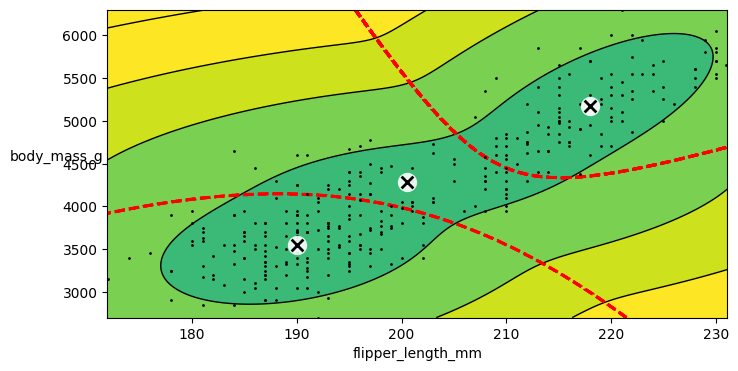

In [240]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm4, pdf2Features, 'flipper_length_mm', 'body_mass_g')

plt.show()

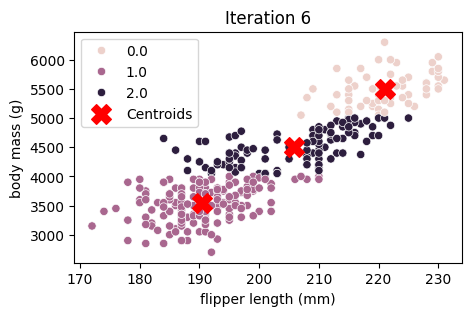

In [242]:
pCentroids, pdf = get_cluster(pdf, initialize_centroids(pdf, 3), plot=True)

In [243]:
means = gm4.means_
means

array([[ 200.47643116, 4284.90787391],
       [ 190.01970776, 3544.82216476],
       [ 217.99906307, 5169.23927517]])

In [244]:
pCentroids

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
current_cluster,,,,
0.0,49.306557,15.649180,221.065574,5501.639344
1.0,41.392771,18.062651,190.457831,3536.445783
2.0,45.006604,16.631132,205.858491,4512.264151


In [245]:
pCentroidValues = pCentroids[['flipper_length_mm', 'body_mass_g']].values
pCentroidValues
#

array([[ 221.06557377, 5501.63934426],
       [ 190.45783133, 3536.44578313],
       [ 205.85849057, 4512.26415094]])

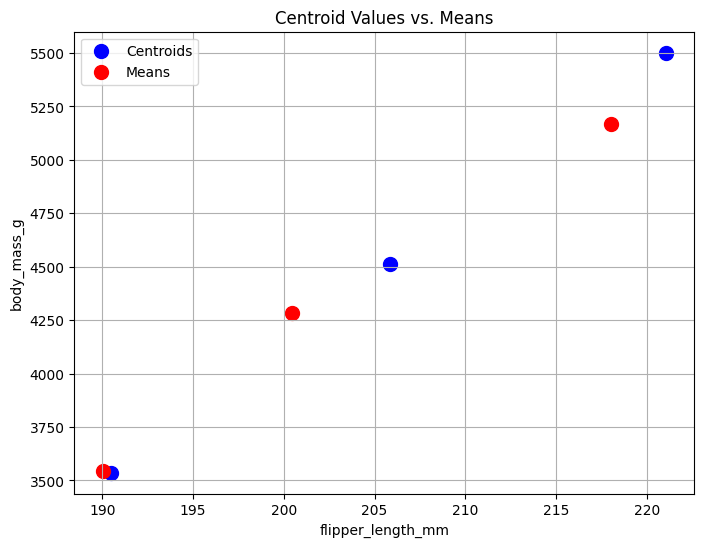

In [246]:
plt.figure(figsize=(8, 6))

plt.scatter(pCentroidValues[:, 0], pCentroidValues[:, 1], color='blue', label='Centroids', s=100)

plt.scatter(means[:, 0], means[:, 1], color='red', label='Means', s=100)

plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title('Centroid Values vs. Means')
plt.legend()
plt.grid(True)
plt.show()

In [247]:
pdf

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,current_cluster
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1.0
340,43.5,18.1,202.0,3400.0,1.0
341,49.6,18.2,193.0,3775.0,1.0
342,50.8,19.0,210.0,4100.0,2.0


In [248]:
pdfWithTargets

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0


In [249]:
target_names = {
    "Adelie": 1.0,
    "Chinstrap": 2.0,
    "Gentoo": 0.0,
}
pdfWithTargets["species_name"] = pdfWithTargets["species"].map(target_names)
pdfWithTargets

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_name
0,Adelie,39.1,18.7,181.0,3750.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,1.0
5,Adelie,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2.0
340,Chinstrap,43.5,18.1,202.0,3400.0,2.0
341,Chinstrap,49.6,18.2,193.0,3775.0,2.0
342,Chinstrap,50.8,19.0,210.0,4100.0,2.0


In [250]:
calculate_accuracy(pdfWithTargets, pdf, 'species_name')

0.5645645645645646

In [251]:
pdf

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,current_cluster
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1.0
340,43.5,18.1,202.0,3400.0,1.0
341,49.6,18.2,193.0,3775.0,1.0
342,50.8,19.0,210.0,4100.0,2.0


In [252]:
Ppredict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

In [253]:
PpredictedDf = pd.DataFrame(Ppredict, columns=['current_cluster'])
PpredictedDf

,current_cluster
0,2
1,2
2,2
3,2
4,2
...,...
328,1
329,1
330,1
331,1


In [254]:
pdfWithTargets

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_name
0,Adelie,39.1,18.7,181.0,3750.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,1.0
5,Adelie,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2.0
340,Chinstrap,43.5,18.1,202.0,3400.0,2.0
341,Chinstrap,49.6,18.2,193.0,3775.0,2.0
342,Chinstrap,50.8,19.0,210.0,4100.0,2.0


In [265]:
target_names = {
    "Adelie": 2.0,
    "Chinstrap": 1.0,
    "Gentoo": 0.0,
}
pdfWithTargets["species_name"] = pdfWithTargets["species"].map(target_names)
pdfWithTargets

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_name
0,Adelie,39.1,18.7,181.0,3750.0,2.0
1,Adelie,39.5,17.4,186.0,3800.0,2.0
2,Adelie,40.3,18.0,195.0,3250.0,2.0
4,Adelie,36.7,19.3,193.0,3450.0,2.0
5,Adelie,39.3,20.6,190.0,3650.0,2.0
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,1.0
340,Chinstrap,43.5,18.1,202.0,3400.0,1.0
341,Chinstrap,49.6,18.2,193.0,3775.0,1.0
342,Chinstrap,50.8,19.0,210.0,4100.0,1.0


In [266]:
pdf

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,current_cluster
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1.0
340,43.5,18.1,202.0,3400.0,1.0
341,49.6,18.2,193.0,3775.0,1.0
342,50.8,19.0,210.0,4100.0,2.0


In [268]:
PpredictedDf

,current_cluster
0,2
1,2
2,2
3,2
4,2
...,...
328,1
329,1
330,1
331,1


In [269]:
pdfWithTargets

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_name
0,Adelie,39.1,18.7,181.0,3750.0,2.0
1,Adelie,39.5,17.4,186.0,3800.0,2.0
2,Adelie,40.3,18.0,195.0,3250.0,2.0
4,Adelie,36.7,19.3,193.0,3450.0,2.0
5,Adelie,39.3,20.6,190.0,3650.0,2.0
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,1.0
340,Chinstrap,43.5,18.1,202.0,3400.0,1.0
341,Chinstrap,49.6,18.2,193.0,3775.0,1.0
342,Chinstrap,50.8,19.0,210.0,4100.0,1.0


In [275]:
pdfWithTargets = pdfWithTargets.reset_index(drop=True)
PpredictedDf = PpredictedDf.reset_index(drop=True)

In [276]:
calculate_accuracy(pdfWithTargets, PpredictedDf, 'species_name')

0.984984984984985